ASSIGNMENT 5


        

NAME: RINKLE SETH
NET ID: RCS170004

WORKED WITH RUCHITA DESHMUKH, VIKRAM GOPALI

In [57]:
import numpy as np
import pandas as pd
if __name__ == '__main__':
    trn=pd.read_csv('/Users/rinkleseth/Desktop/spring2019/ml/CS6375-S19-Homework5/usps.train',header=None)
    tst=pd.read_csv('/Users/rinkleseth/Desktop/spring2019/ml/CS6375-S19-Homework5/usps.test',header=None)
    valid= test=pd.read_csv('/Users/rinkleseth/Desktop/spring2019/ml/CS6375-S19-Homework5/usps.valid',header=None)
    ytrn=trn.iloc[:,0].values
    Xtrn=trn.iloc[:,1:].values

    ytst=tst.iloc[:,0].values
    Xtst=tst.iloc[:,1:].values
    
    yvalid=valid.iloc[:,0].values
    Xvalid=valid.iloc[:,1:].values

In [58]:
def getVarianceUpto(num,normalized):
    cumVariance=0
    for i in range(num):
        cumVariance+=normalized[i]
    return cumVariance

In [59]:
import matplotlib.pyplot as plt
def variancePlot16(normalized):
    yaxis=[]
    xaxis=[]
    c=10
    for i in range(16):
        xaxis.append(c*i)
        yaxis.append(getVarianceUpto(c*i,normalized))

    #print(y)
    plt.figure()
#yaxis
    plt.xlabel("No. of components")
    plt.ylabel("Cumulative variance captured")
    
    plt.plot(xaxis,yaxis)
    plt.show()
    

In [60]:
#return the top no. of eigen vectors you need
def preprocess(Xtrn):
    #preprocess
    M = mean(Xtrn.T, axis=1)
    C = Xtrn - M
    V = cov(C.T)
    #returns covariance matrix
    return V
    #eigen decomposition
   
    
    #sorted vectors
   

In [61]:
def computeEigenvectors(vectors,values,top):
    idx = values.argsort()[::-1]
    topValues = values[idx]
    topVectors = vectors[:,idx]
    topVectors=topVectors[:,:top]
    
    #normalize
    
    #variance captured by first 16 vectors
    normalized=normalize(topValues)
    ans16=getVarianceUpto(16,normalized) 
    
    return topVectors
    

In [62]:
def normalize(topValues):
    s=sum(topValues)
    normalized=[]
    for i in range(len(topValues)):
        normalized.append(topValues[i]/s)
    return normalized

In [63]:
def getNoOfVectors(normalized,per):
    ans=0
    num=-1
    while ans<per:
        num+=1
        ans+=normalized[num]
    return num+1
        

In [64]:
def createPlots(X100):
    import numpy as np
    fig,ax=plt.subplots(4,4,figsize=(16,16))
    
    i=0
    j=0
    while(i<16):
        im=X100[i,:]
        im=np.reshape(im,(16,16))
        if(i<4):
            
            ax[0,i].imshow(im,interpolation='bilinear')
        elif i<8:
            
            ax[1,i-4].imshow(im,interpolation='bilinear')
        elif i<12:
            ax[2,i-8].imshow(im,interpolation='bilinear')
        else:
            ax[3,i-12].imshow(im,interpolation='bilinear')
        
        i=i+1
    
    plt.show()

Q.1 a)TOP 16 EIGENDIGITS:


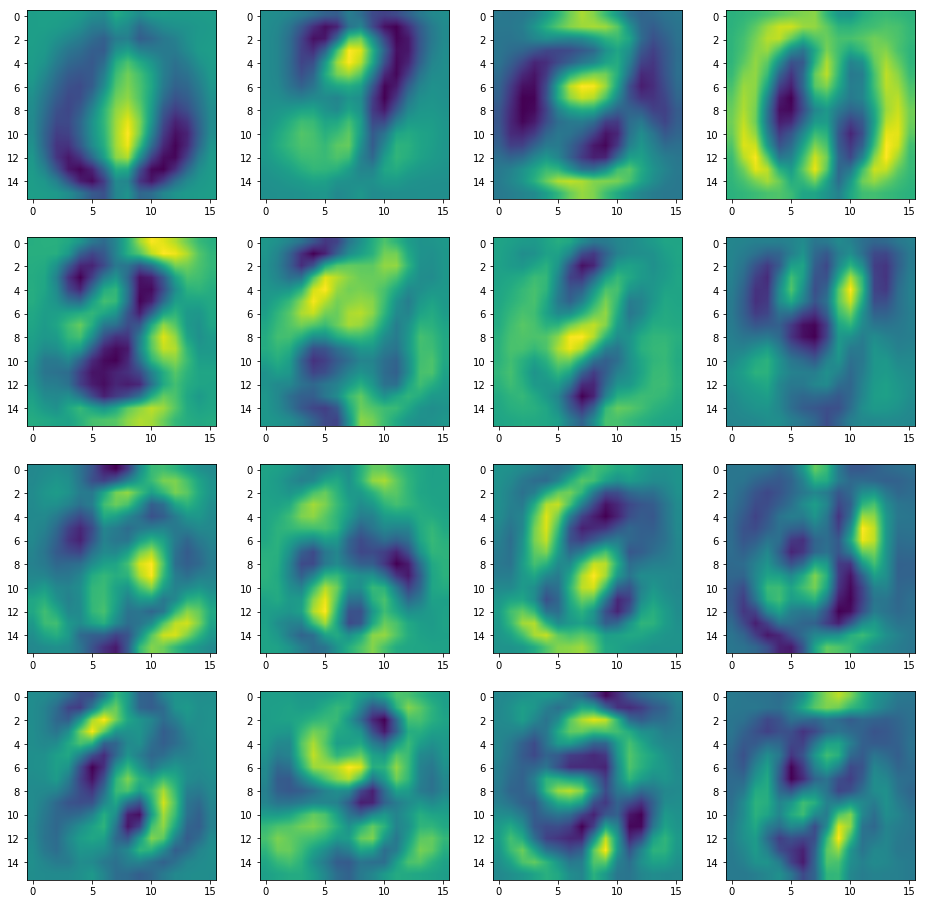

Q.1 b)Cumulative explained variance VS no. of components


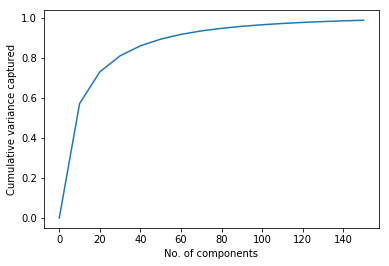

('Dimensionality to achieve 70% variance:', 18)
('Dimensionality to achieve 80% variance:', 29)
('Dimensionality to achieve 90% variance:', 53)


In [65]:
#calculate mean and preprocess
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

#part a


coVariance=preprocess(Xtrn)
values, vectors = eig(coVariance)
idx = values.argsort()[::-1]
topValues = values[idx]
#print(topValues)
normalized=normalize(topValues)
#print("normal:",normalized)
top16Vectors=computeEigenvectors(vectors,values,16)
print("Q.1 a)TOP 16 EIGENDIGITS:")
createPlots(top16Vectors.T)
#part b
print("Q.1 b)Cumulative explained variance VS no. of components")
variancePlot16(normalized)
k=[]
#eigen vectors required to capture 70,80,90% variance- part b
k70=getNoOfVectors(normalized,0.7)
k.append(k70)
print("Dimensionality to achieve 70% variance:",k70)
k80=getNoOfVectors(normalized,0.8)
k.append(k80)
print("Dimensionality to achieve 80% variance:",k80)
k90=getNoOfVectors(normalized,0.9)
k.append(k90)
print("Dimensionality to achieve 90% variance:",k90)

#-------------------------------
#compute projections
#array for projections- 70,80,90,100
#k=[]
eigenVectors=[]
#compute eigen vectors for 70% variance i.e top k eigenvectors
for x in k:
    eigenVectors.append(computeEigenvectors(vectors,values,x))

#projections for f=70,80,90,100 - Q.1 PART c(a)
P=[]
Ptest=[]
Pvalid=[]
for vector in eigenVectors:
    P.append(np.matmul(Xtrn,vector))
    Pvalid.append(np.matmul(Xvalid,vector))
    Ptest.append(np.matmul(Xtst,vector))
P.append(Xtrn) #100% variance
Pvalid.append(Xvalid)
Ptest.append(Xtst)

In [68]:
#Q.1 part c(b,c)
from sklearn.linear_model import SGDClassifier
from prettytable import PrettyTable
alpha=[0.0001,0.001,0.01,0.1]
variance=[70,80,90,100]
labels = ['Table','70', '80', '90', '100']
t = PrettyTable(labels)
t1=PrettyTable(labels)
#print(t)
#print(len(P))
validErr=dict()
for val in alpha:
    model=SGDClassifier(loss="hinge", penalty="l2", alpha=val, max_iter=50,tol=0.19)
    i=0
    valid=[]
    test=[]
    valid.append(val)
    test.append(val)
    clf=dict()
    for p in P:
        clf[i]=model.fit(p,ytrn)
        #print(len(Pvalid[i]))
        valid.append(100*clf[i].score(Pvalid[i],yvalid))
        test.append(100*clf[i].score(Ptest[i],ytst))
        #validErr[val,variance[i]]=clf[i].score(Pvalid[i],yvalid)
        i=i+1
    #print(validErr)
    #print(len(valid))
    t1.add_row(test)
    t.add_row(valid)

print("Validation Accuracy:")
print(t)
print("Testing Accuracy:")
print(t1)     
#Question 1-part d
print("Best k-alpha pair on test set:(100,0.01) with accuracy is 93.66%")

Validation Accuracy:
+--------+-------------------+-------------------+-------------------+-------------------+
| Table  |         70        |         80        |         90        |        100        |
+--------+-------------------+-------------------+-------------------+-------------------+
| 0.0001 | 87.66666666666667 | 90.33333333333333 | 91.33333333333333 | 91.33333333333333 |
| 0.001  | 84.33333333333334 | 89.66666666666666 |        90.0       | 91.33333333333333 |
|  0.01  | 85.66666666666667 | 90.66666666666666 | 93.33333333333333 |        92.0       |
|  0.1   |        87.0       |        90.0       | 90.66666666666666 | 91.66666666666666 |
+--------+-------------------+-------------------+-------------------+-------------------+
Testing Accuracy:
+--------+-------------------+-------------------+-------------------+-------------------+
| Table  |         70        |         80        |         90        |        100        |
+--------+-------------------+-------------------+-

In [67]:
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
sgd=linear_model.SGDClassifier(loss='hinge',penalty='l2',alpha=0.01).fit(Xtrn,ytrn)
print("Accuracy without feature selection is:",sgd.score(Xtst,ytst)*100)


('Accuracy without feature selection is:', 92.0)


SVMs with feature selection perform better in many cases as they filter noise from the dataset.
Hence they prevent overfitting of data, improve hold out perfomance and speed of the algorithm by selecting the most important or relevant features.




In [52]:
#question 2-part b 
import scipy
from scipy.spatial.distance import pdist,squareform
from numpy.linalg import eig
from sklearn import cluster
from sklearn.cluster import KMeans

def spectral_clustering(x, k, gamma=17):
    #print("aa")
    A = np.exp(-1*gamma*pdist(x,'euclidean'))
    A=squareform(A)
    B=np.sum(A,axis=1)

    D=np.diag(B)

    #Laplacian matrix
    L=np.subtract(D,A)
    coV=preprocess(L)
    values, vectors = eig(coV)
    
    #ascending order
    idx = np.argsort(values)
    topValues = values[idx]
    topVectors = vectors[:,idx]
    topVectors=topVectors[:,:k]
    
    clf = cluster.KMeans(n_clusters=k,random_state=0).fit(topVectors)
    plt.scatter(x[:, 0], x[:, 1], c=clf.labels_, s=50, cmap='viridis')
    plt.title("Gamma"+str(gamma))
    plt.show()


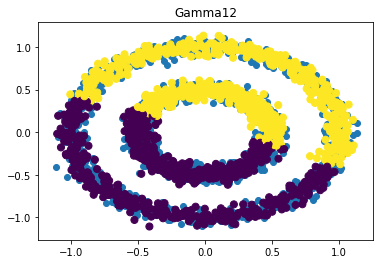

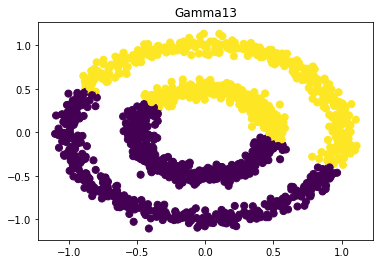

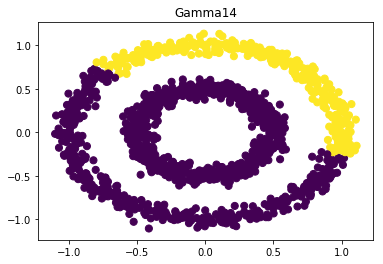

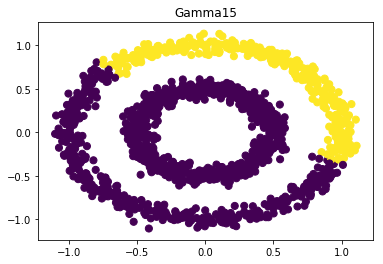

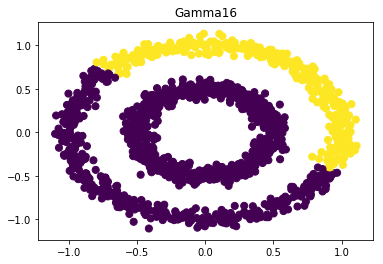

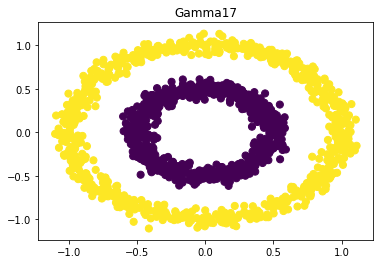

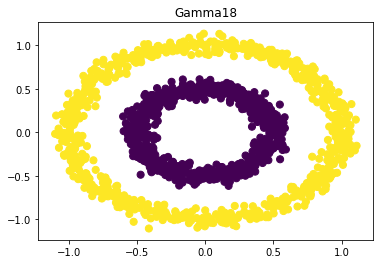

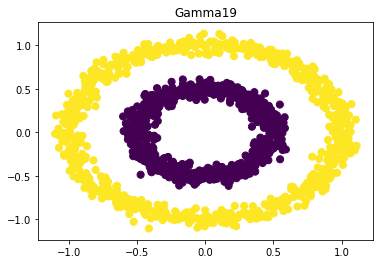

In [56]:
#Question 2- part a
from sklearn import datasets
X, Y = datasets.make_circles(n_samples=1500, factor=.5, noise=.05)
plt.scatter(X[:,1],X[:,0])
spectral_clustering(X,2,gamma=12)
spectral_clustering(X,2,gamma=13)
spectral_clustering(X,2,gamma=14)
spectral_clustering(X,2,gamma=15)
spectral_clustering(X,2,gamma=16)
spectral_clustering(X,2,gamma=17)
spectral_clustering(X,2,gamma=18)
spectral_clustering(X,2,gamma=19)

Best value of gamma: 17 .
It outperforms k-means clustering at gamma=14

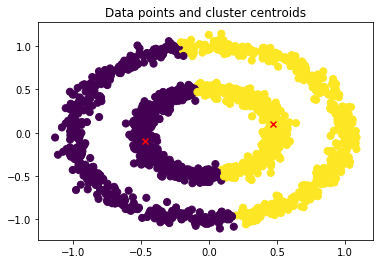

In [13]:
#SKLEARN kmeans
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2)
#kmeans.fit(X)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
y = kmeans.predict(X)
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.scatter(X[:, 0], X[:, -1],c=y, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


As we can see from the above figures, spectral clustering outperforms k-means clustering when gamma=17. 
k-means fails to effectively cluster the data.

In [20]:
import scipy
from scipy.spatial.distance import pdist,squareform,cdist
from numpy.linalg import eig
from sklearn import cluster
from sklearn.cluster import KMeans

def spectral_clustering_image(x, k):
    #print("aa")
    A = np.exp(-1*1*pdist(x,'euclidean'))
    A=squareform(A)
    B=np.sum(A,axis=1)

    D=np.diag(B)

    #Laplacian matrix
    L=np.subtract(D,A)
    #print(np.shape(L))
    #covariance matrix
    coV=preprocess(L)
    values, vectors = scipy.linalg.eigh(L,eigvals=(0,k-1))
    
    #ascending order
    idx = np.argsort(values)
    topValues = values[idx]
    topVectors = vectors[:,idx]
    topVectors=topVectors[:,:k]
    #print(topValues)
    #print(np.shape(topVectors))
    clf = cluster.KMeans(n_clusters=k,random_state=0).fit(topVectors)
    img = np.reshape(clf.labels_,(81,121))
    plt.imshow(img)
    plt.show()
    

Spectral clustering:


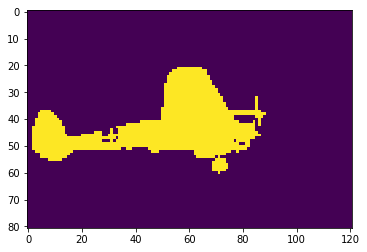

In [71]:
import cv2
img = cv2.imread('./seg.jpg',0)
plt.imshow(img)
img = np.reshape(img,(9801,1))
print("Spectral clustering:")
spectral_clustering_image(img,2)

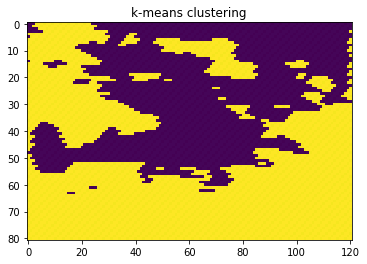

In [75]:
#kmeans clustering on Image
import numpy as np
import cv2
img = cv2.imread('./seg.jpg',0)
#print(np.shape(img))
Z = img.reshape((-1,3))
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((81,121))
plt.imshow(res2)
plt.title("k-means clustering")
plt.show()

Spectral clustering outperforms k-means clustering for gamma value=1 as we can see from the above image.
